Damien Nazário

Dataset: https://www.kaggle.com/datasets/joebeachcapital/30000-spotify-songs

## **Final Project:** Music and Artist Analysis on Spotify

**Description:**

The dataset contains detailed information about Spotify songs. Each row in the dataset represents a unique song and includes 25 columns representing everything from Identification and Metadata to Musical Features. This dataset is useful for detailed analysis of musical characteristics, popularity trends, genre preferences, and other musical properties on Spotify.

**Objective:**

To investigate and visualize the connections between songs, examine the popularity of songs and artists, and uncover patterns in this Spotify dataset. We aim to demonstrate how songs relate to artists, music genres, and subgenres, and finally, implement a simple recommendation system based on the PageRank algorithm.

## Questions to be answered:

**What does each vertex and edge represent?**

Each type of graph provides different insights into how the data is structured and how elements are linked together. Since we have decided to approach several graphs, we will identify each graph and then provide the respective answer.

- **Genre and Subgenre Graph:** The vertices represent a genre or a subgenre, and each edge represents the connections indicating specific relationships between those genres and subgenres.

- **Artist and Playlist Genre Graph:** The vertices represent an artist or a playlist genre, and each edge represents associations between artists and the genres they are associated with.

- **Artist Similarity by Genre Graph:** The vertices represent an artist or a genre, and each edge represents the association of an artist with a particular playlist genre.

- **Artist and Their Song Graph:** Each vertex represents a song, and each edge represents the popularity of the song.

- **Collaborations Graph:** The vertices represent the artist or the songs they have collaborated on, and each edge represents a specific collaboration between the artists mentioned in the same song.

- **Subgenre and Playlist Graph:** Each vertex represents a specific subgenre of playlists, and each edge represents the connection between two subgenres that coexist within the same playlists.

- **Bipartite Artist and Music Genre Graph:** The vertices represent an artist or a music genre, and each edge represents the connection between an artist and a music genre.

**How many vertices and edges are there?**

In total, there are 32,833 possible vertices, and the number of edges represents the connections between them (the total number of songs and their connections).

**Is the network weighted? If so, what does each weight represent?**

Yes, the network can be weighted, where each edge between two vertices (songs) represents the number of playlists in which those songs appear together. This weight indicates the strength of the connection between the songs, reflecting the frequency with which they are heard together. Thus, songs with a higher weight between them are those frequently associated by listeners in playlists, revealing stronger and more meaningful occurrence patterns in the network.

**Is the network directed? If so, what does the direction of each edge mean?**

Typically, occurrence networks in playlists are undirected, meaning that the edges do not have a specific direction. Each edge between two vertices (songs) indicates a bidirectional occurrence relationship, meaning that both songs are frequently heard together, with no distinction as to whether one influences the other in a directed manner.

**How are the artists connected?**

We decided to explore how artists are connected through the analysis of various factors: the similarity of their songs, the frequency of collaborations, and occurrences in playlists. By examining these connections, we can highlight collaboration patterns, identify shared musical styles, and even discover less obvious associations between artists that may have an impact on the music industry.

**Application:**

We concluded that an interesting approach for visualizing music and artist networks would be to build a graph where each node represents a song, and the edges between nodes indicate how frequently these songs appear together in playlists. This method allows for identifying groups of songs that are often listened to together and also reveals occurrence patterns that may indicate common musical preferences among listeners.

**Popularity Analysis:**

To identify the most popular songs and artists based on the popularity of their songs, we opted to implement a recommendation system using the PageRank algorithm. This system shows the user the 5 most similar artists in relation to the artist they have chosen.


In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from collections import defaultdict

In [ ]:
df = pd.read_csv('spotify_songs.csv')

### Dataset Description

The dataset contains information about various music tracks and their characteristics. Here is a description of some important columns:

- `track_id`: Unique identifier for the track.
- `track_name`: Name of the track.
- `track_artist`: Artist of the track.
- `track_popularity`: Popularity of the track (0-100).
- `track_album_id`: Unique identifier for the album.
- `track_album_name`: Name of the album.
- `track_album_release_date`: Release date of the album.
- `playlist_name`: Name of the playlist where the track is included.
- `playlist_id`: Unique identifier for the playlist.
- `playlist_genre`: Genre of the playlist.
- `key`: Musical ID of the track.
- `loudness`: Average loudness of the track in decibels (dB).
- `mode`: Mode of the track (major or minor).
- `speechiness`: Proportion of spoken words in the track.
- `acousticness`: Measure of how acoustic the track is.
- `instrumentalness`: Measure of how instrumental the track is.
- `liveness`: Measure of the presence of a live audience.
- `valence`: Measure of how positive the track is.
- `tempo`: Tempo of the track in beats per minute (BPM).
- `duration_ms`: Duration of the track in milliseconds.



In [ ]:
df.head()

,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,7,-3.778,1,0.1020,0.0287,0.000009,0.2040,0.277,121.956,169093
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,-4.672,1,0.0359,0.0803,0.000000,0.0833,0.725,123.976,189052


EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32833 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32833 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32833 non-null  int64  
 4   track_album_id            32833 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32833 non-null  object 
 7   playlist_name             32833 non-null  object 
 8   playlist_id               32833 non-null  object 
 9   playlist_genre            32833 non-null  object 
 10  playlist_subgenre         32833 non-null  object 
 11  danceability              32833 non-null  float64
 12  energy                    32833 non-null  float64
 13  key                       32833 non-null  int64  
 14  loudne

In [ ]:
df.isnull().sum()

track_id                    0
track_name                  5
track_artist                5
track_popularity            0
track_album_id              0
track_album_name            5
track_album_release_date    0
playlist_name               0
playlist_id                 0
playlist_genre              0
playlist_subgenre           0
danceability                0
energy                      0
key                         0
loudness                    0
mode                        0
speechiness                 0
acousticness                0
instrumentalness            0
liveness                    0
valence                     0
tempo                       0
duration_ms                 0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000,32828.000000
mean,42.483551,0.654850,0.698603,5.373949,-6.719529,0.565737,0.107053,0.175352,0.084760,0.190175,0.510556,120.883642,225796.829779
std,24.980476,0.145092,0.180916,3.611572,2.988641,0.495667,0.101307,0.219644,0.224245,0.154313,0.233152,26.903632,59836.492346
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171250,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.961000,187804.500000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918250,253581.250000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32828 entries, 0 to 32832
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_id                  32828 non-null  object 
 1   track_name                32828 non-null  object 
 2   track_artist              32828 non-null  object 
 3   track_popularity          32828 non-null  int64  
 4   track_album_id            32828 non-null  object 
 5   track_album_name          32828 non-null  object 
 6   track_album_release_date  32828 non-null  object 
 7   playlist_name             32828 non-null  object 
 8   playlist_id               32828 non-null  object 
 9   playlist_genre            32828 non-null  object 
 10  playlist_subgenre         32828 non-null  object 
 11  danceability              32828 non-null  float64
 12  energy                    32828 non-null  float64
 13  key                       32828 non-null  int64  
 14  loudness   

In [ ]:
genre_mapping = {}
subgenre_mapping = {}

for index, genre in enumerate(df['playlist_genre'].unique()):
    genre_mapping[genre] = index + 1

for index, subgenre in enumerate(df['playlist_subgenre'].unique()):
    subgenre_mapping[subgenre] = index + 1

df['playlist_genre_encoded'] = df['playlist_genre'].map(genre_mapping)
df['playlist_subgenre_encoded'] = df['playlist_subgenre'].map(subgenre_mapping)

df


<ipython-input-9-7552d43c7566>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['playlist_genre_encoded'] = df['playlist_genre'].map(genre_mapping)
<ipython-input-9-7552d43c7566>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['playlist_subgenre_encoded'] = df['playlist_subgenre'].map(subgenre_mapping)


,track_id,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,playlist_genre_encoded,playlist_subgenre_encoded
0,6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0583,0.102000,0.000000,0.0653,0.5180,122.036,194754,1,1
1,0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0373,0.072400,0.004210,0.3570,0.6930,99.972,162600,1,1
2,1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,0,0.0742,0.079400,0.000023,0.1100,0.6130,124.008,176616,1,1
3,75FpbthrwQmzHlBJLuGdC7,Call You Mine - Keanu Silva Remix,The Chainsmokers,60,1nqYsOef1yKKuGOVchbsk6,Call You Mine - The Remixes,2019-07-19,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.1020,0.028700,0.000009,0.2040,0.2770,121.956,169093,1,1
4,1e8PAfcKUYoKkxPhrHqw4x,Someone You Loved - Future Humans Remix,Lewis Capaldi,69,7m7vv9wlQ4i0LFuJiE2zsQ,Someone You Loved (Future Humans Remix),2019-03-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,...,1,0.0359,0.080300,0.000000,0.0833,0.7250,123.976,189052,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32828,7bxnKAamR3snQ1VGLuVfC1,City Of Lights - Official Radio Edit,Lush & Simon,42,2azRoBBWEEEYhqV6sb7JrT,City Of Lights (Vocal Mix),2014-04-28,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,0.0936,0.076600,0.000000,0.0668,0.2100,128.170,204375,6,24
32829,5Aevni09Em4575077nkWHz,Closer - Sultan & Ned Shepard Remix,Tegan and Sara,20,6kD6KLxj7s8eCE3ABvAyf5,Closer Remixed,2013-03-08,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,0.0420,0.001710,0.004270,0.3750,0.4000,128.041,353120,6,24
32830,7ImMqPP3Q1yfUHvsdn7wEo,Sweet Surrender - Radio Edit,Starkillers,14,0ltWNSY9JgxoIZO4VzuCa6,Sweet Surrender (Radio Edit),2014-04-21,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,0,0.0481,0.108000,0.000001,0.1500,0.4360,127.989,210112,6,24
32831,2m69mhnfQ1Oq6lGtXuYhgX,Only For You - Maor Levi Remix,Mat Zo,15,1fGrOkHnHJcStl14zNx8Jy,Only For You (Remixes),2014-01-01,♥ EDM LOVE 2020,6jI1gFr6ANFtT8MmTvA2Ux,edm,...,1,0.1090,0.007920,0.127000,0.3430,0.3080,128.008,367432,6,24


In [ ]:
df['playlist_subgenre']
estilos =df.sample(frac=0.80)
estilos['playlist_subgenre'].head()

19902                latin hip hop
25979                     neo soul
32028    progressive electro house
24281               new jack swing
30152                      pop edm
Name: playlist_subgenre, dtype: object

In [ ]:
numeric_cols = df.select_dtypes(include=['float64', 'int64', 'uint8']).columns
corr_matrix = df[numeric_cols].corr()


fig = px.imshow(
    corr_matrix,
    text_auto=True,
    height=1200,
    width=1200,
    color_continuous_scale=px.colors.sequential.Greens,
    aspect='auto',
    title='<b>Matrix de Correlação</b>'
)

fig.update_layout(
    title_x=0.5,
    title_font_size=20,
    xaxis_title="Colunas",
    yaxis_title="Colunas",
    xaxis_nticks=len(corr_matrix.columns),
    yaxis_nticks=len(corr_matrix.columns)
)

fig.show()


#### Grafos

In [ ]:
amostra = df.sample(frac=0.01, random_state=42)
amostra.shape


(328, 25)

In [ ]:
total_artistas= amostra['track_artist'].nunique()
total_generos= amostra['playlist_genre'].nunique()
print(f'O total de artistas da amostra: {total_artistas}')
print(f'O total de generos da amostra: {total_generos}')

O total de artistas da amostra: 309
O total de generos da amostra: 6


##### Grafo Genero e Subgenero

<ipython-input-14-080ccaee2519>:5: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



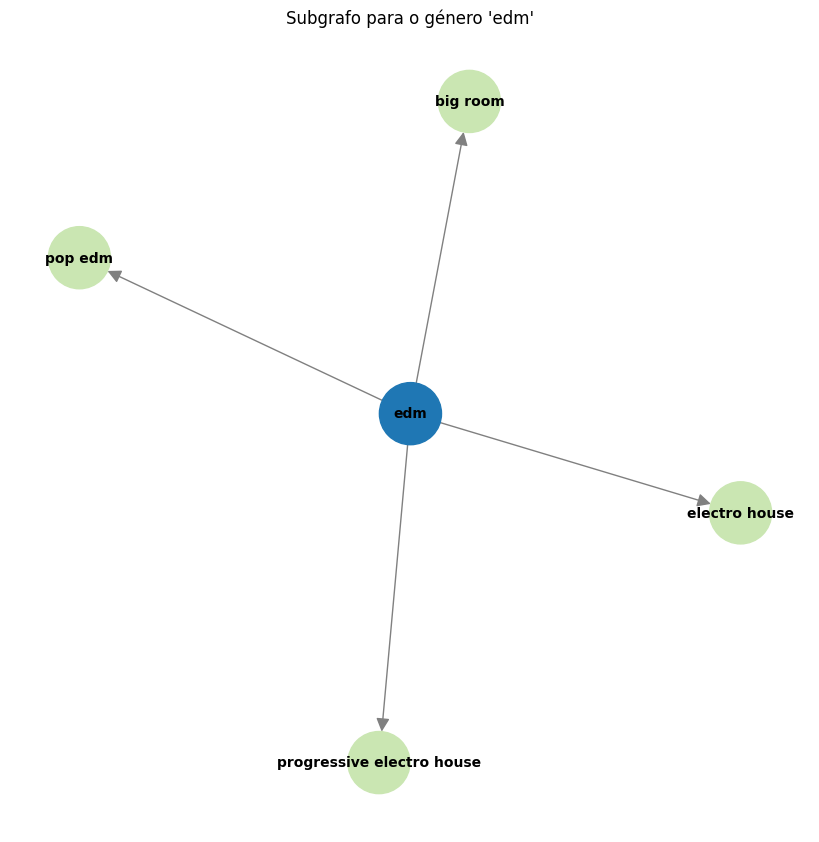

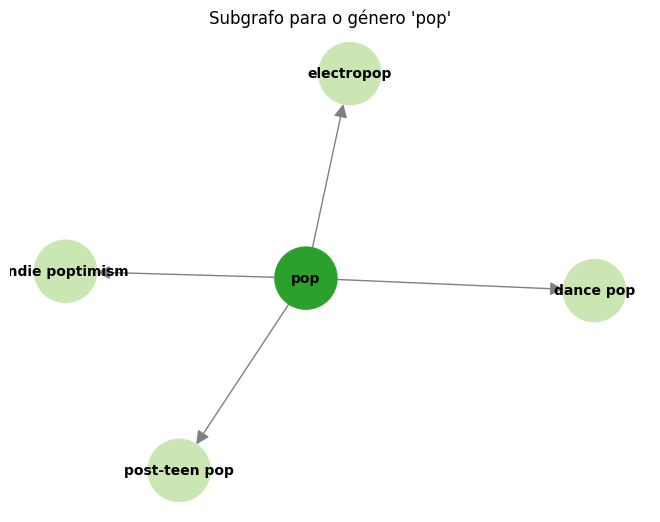

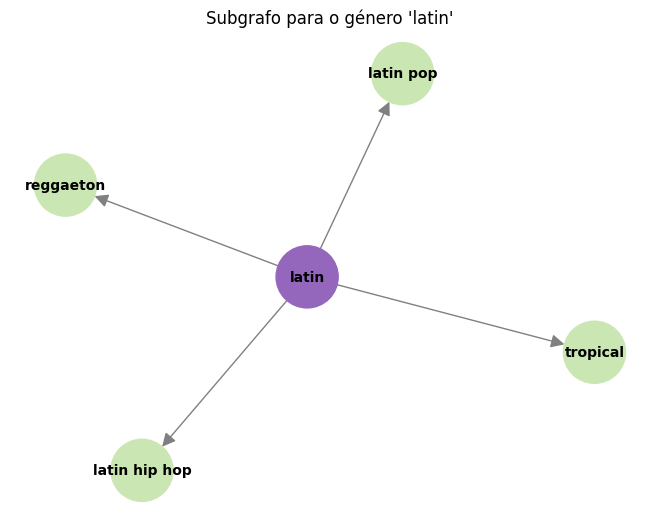

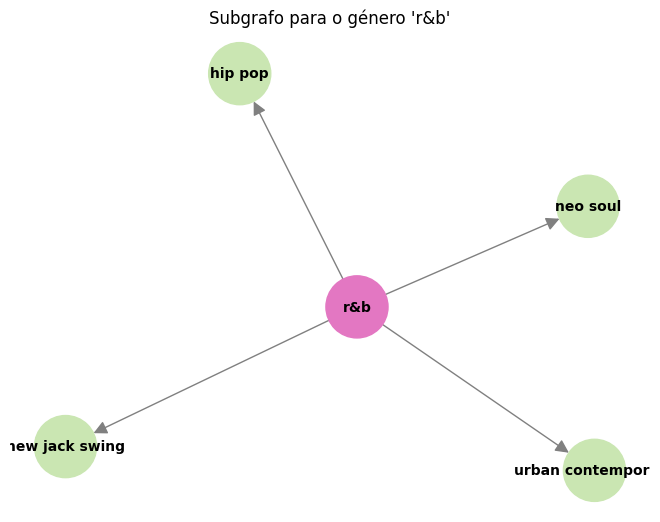

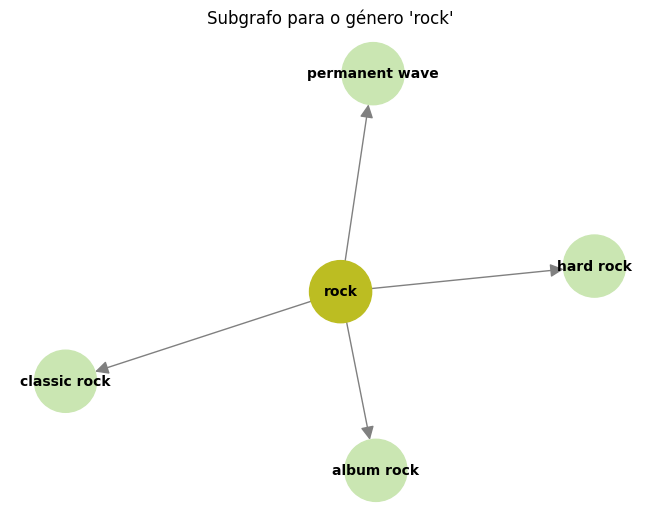

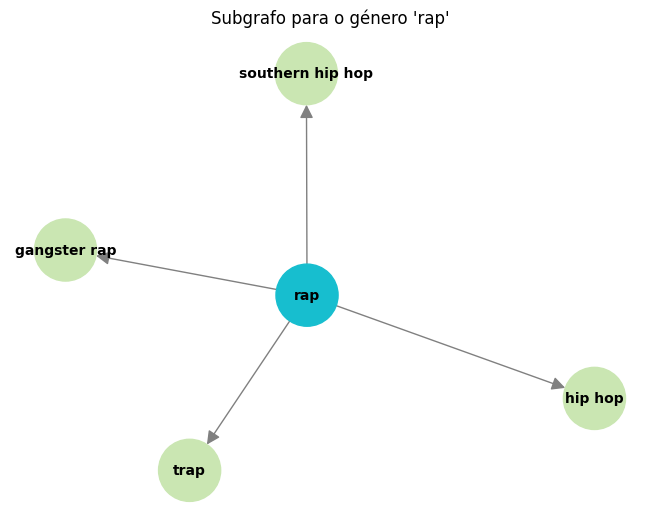

In [ ]:
G = nx.DiGraph()

generos_unicos = amostra['playlist_genre'].unique()

paleta_cores = plt.cm.get_cmap('tab10', len(generos_unicos))

cores_generos = {genero: paleta_cores(i) for i, genero in enumerate(generos_unicos)}

for index, row in amostra.iterrows():
    genero = row['playlist_genre']
    subgenero = row['playlist_subgenre']

    G.add_node(genero, label=genero)
    G.add_node(subgenero)
    G.add_edge(genero, subgenero)


plt.figure(figsize=(8, 8))
genero_subgrafos = {}
for genero in generos_unicos:
    genero_subgrafos[genero] = G.subgraph([node for node in G.nodes() if node == genero or node in amostra[amostra['playlist_genre'] == genero]['playlist_subgenre'].tolist()])
    pos = nx.spring_layout(genero_subgrafos[genero], k=0.4)  # Layout spring para cada subgrafo
    node_colors = [cores_generos.get(n, '#CAE6B2') for n in genero_subgrafos[genero].nodes()]
    nx.draw(genero_subgrafos[genero], pos, with_labels=True, node_color=node_colors, node_size=2000, font_size=10, edge_color='gray', font_weight='bold', arrowsize=20)
    plt.title('Relação entre Género e Subgênero de Playlist com Cores Diferentes')
    plt.title(f"Subgrafo para o género '{genero}'")
    plt.show()


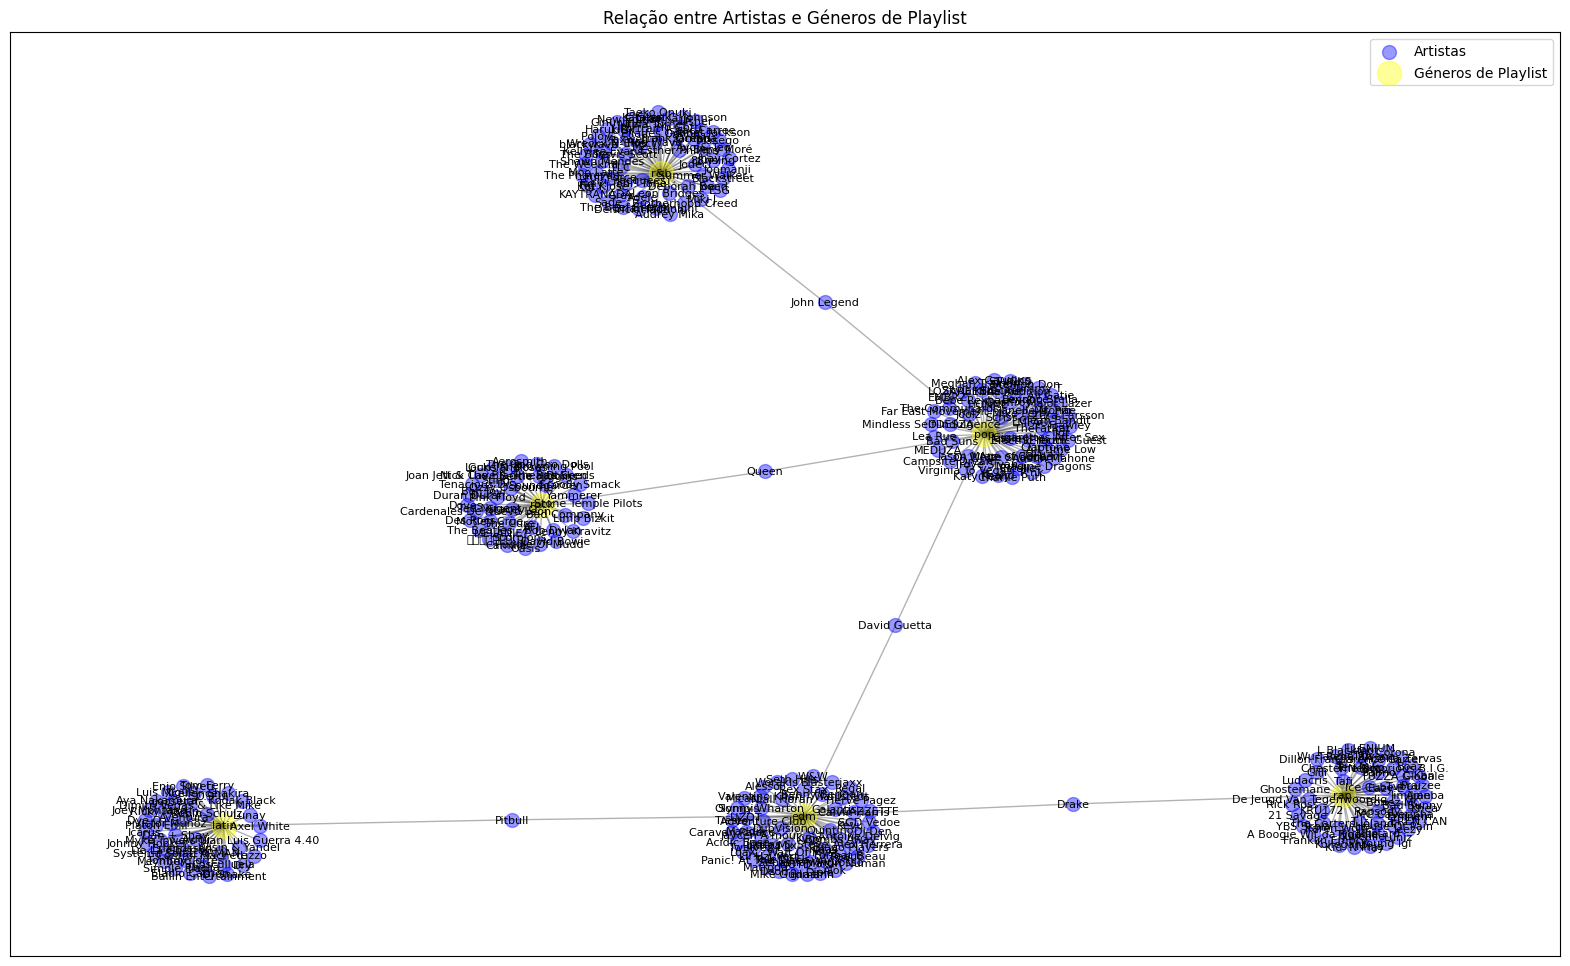

In [ ]:
G = nx.Graph()

for index, row in amostra.iterrows():
    artist = row['track_artist']
    genre = row['playlist_genre']
    G.add_node(artist, type='artist')
    G.add_node(genre, type='genre')
    G.add_edge(artist, genre)

pos = nx.spring_layout(G)

plt.figure(figsize=(20, 12))
nx.draw_networkx_nodes(G, pos, nodelist=[node for node, data in G.nodes(data=True) if data['type'] == 'artist'], node_size=100, node_color='blue', alpha=0.4, label='Artistas')
nx.draw_networkx_nodes(G, pos, nodelist=[node for node, data in G.nodes(data=True) if data['type'] == 'genre'], node_size=300, node_color='yellow', alpha=0.4, label='Géneros de Playlist')
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, font_size=8)
plt.title('Relação entre Artistas e Géneros de Playlist')
plt.legend()
plt.show()


In [ ]:
G = nx.DiGraph()

for _, row in df.iterrows():
    track_id = row['track_id']
    playlist_id = row['playlist_id']
    G.add_node(track_id, label=row['track_name'], type='track')
    G.add_node(playlist_id, label=row['playlist_name'], type='playlist')

    G.add_edge(track_id, playlist_id)

print(f"Número de vértices: {G.number_of_nodes()}")
print(f"Número de arestas: {G.number_of_edges()}")

Número de vértices: 28823
Número de arestas: 32246


Grafico de genero / artista

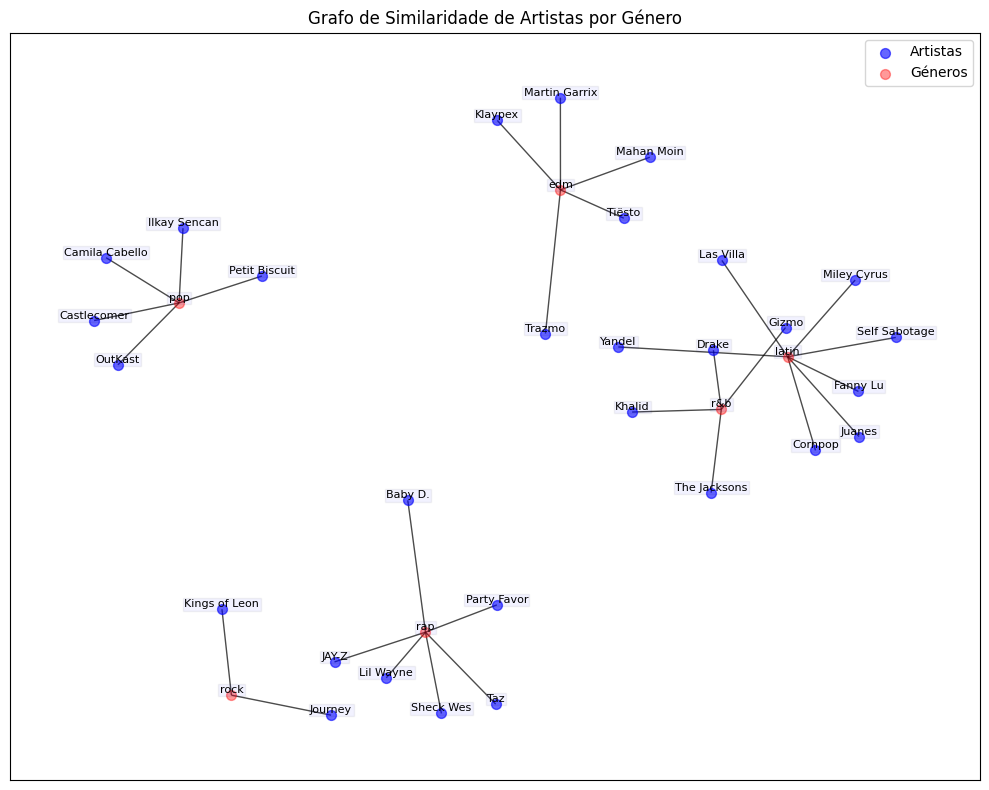

Comunidade 1: Self Sabotage, Yandel, Cornpop, Las Villa, Fanny Lu, latin, Miley Cyrus, Juanes
Comunidade 2: JAY-Z, Party Favor, Lil Wayne, Baby D., Sheck Wes, Taz, rap
Comunidade 3: Trazmo, edm, Mahan Moin, Tiësto, Klaypex, Martin Garrix
Comunidade 4: Petit Biscuit, OutKast, Castlecomer, Camila Cabello, Ilkay Sencan, pop
Comunidade 5: The Jacksons, r&b, Drake, Khalid, Gizmo
Comunidade 6: Journey, rock, Kings of Leon


In [ ]:
df = pd.read_csv('spotify_songs.csv')

fracao_amostra = 0.0009
indices_amostra = np.random.choice(df.index, size=int(len(df) * fracao_amostra), replace=False)
df = df.loc[indices_amostra]

colunas_interesse = ['track_artist', 'playlist_genre', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']
df = df[colunas_interesse].dropna()

df_generos = pd.get_dummies(df['playlist_genre'], prefix='genero')

scaler = StandardScaler()
atributos = df.drop(['track_artist', 'playlist_genre'], axis=1)
atributos_normalizados = scaler.fit_transform(atributos)

matriz_similaridade = cosine_similarity(atributos_normalizados)

G = nx.Graph()

generos_musicais = df['playlist_genre'].unique()
for genero in generos_musicais:
    G.add_node(genero, label='genero')

artistas = df['track_artist'].values
generos_artistas = df['playlist_genre'].values

for artista, genero in zip(artistas, generos_artistas):
    G.add_node(artista, label='artista')
    G.add_edge(artista, genero)

for i in range(len(artistas)):
    for j in range(i + 1, len(artistas)):
        if artistas[i] != artistas[j]:
            similaridade = matriz_similaridade[i, j]
            if similaridade > 0.9:
                G.add_edge(artistas[i], artistas[j], weight=similaridade)

plt.figure(figsize=(10, 8))
posicao = nx.spring_layout(G, k=0.4)

nos_artistas = [n for n in G.nodes if G.nodes[n]['label'] == 'artista']
nos_generos = [n for n in G.nodes if G.nodes[n]['label'] == 'genero']

nx.draw_networkx_nodes(G, posicao, nodelist=nos_artistas, node_color='blue', node_size=50, alpha=0.6, label='Artistas')
nx.draw_networkx_nodes(G, posicao, nodelist=nos_generos, node_color='red', node_size=50, alpha=0.4, label='Géneros')

nx.draw_networkx_edges(G, posicao, alpha=0.7)

labels = nx.draw_networkx_labels(G, posicao, font_size=8, font_color='black', verticalalignment='bottom',
                                 bbox=dict(facecolor='blue', alpha=0.05, pad=1))

plt.title('Grafo de Similaridade de Artistas por Género')
plt.legend(scatterpoints=1)
plt.tight_layout()
plt.show()

from networkx.algorithms.community import greedy_modularity_communities

comunidades = list(greedy_modularity_communities(G))
for i, comunidade in enumerate(comunidades):
    print(f"Comunidade {i + 1}: {', '.join(comunidade)}")


In [ ]:
df = pd.read_csv('spotify_songs.csv')
df = df.dropna(subset=['track_name', 'track_artist', 'track_popularity'])
G = nx.Graph()
G.add_nodes_from(df['track_id'].unique())


playlists = df['playlist_id'].unique()
for playlist_id in playlists:
    playlist_tracks = df[df['playlist_id'] == playlist_id]['track_id'].tolist()
    for i in range(len(playlist_tracks)):
        for j in range(i + 1, len(playlist_tracks)):
            G.add_edge(playlist_tracks[i], playlist_tracks[j])


degree_centrality = nx.degree_centrality(G)
sorted_degrees = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)


top_central_songs = [song_id for song_id, centrality in sorted_degrees[:10]]


top_songs_info = df[df['track_id'].isin(top_central_songs)][['track_name', 'track_artist', 'track_popularity']]
top_songs_info = top_songs_info.drop_duplicates(subset=['track_name'])
top_songs_info = top_songs_info.sort_values(by='track_popularity', ascending=False)

print("Top 10 músicas mais centrais na rede de coocorrência de playlists:")
print(top_songs_info)

artist_popularity = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False)
top_popular_artists = artist_popularity.head(10)



Top 10 músicas mais centrais na rede de coocorrência de playlists:
                       track_name         track_artist  track_popularity
139     RITMO (Bad Boys For Life)  The Black Eyed Peas                96
344                       bad guy        Billie Eilish                95
1303          HIGHEST IN THE ROOM         Travis Scott                94
133         Closer (feat. Halsey)     The Chainsmokers                85
95                     The Middle                 Zedd                84
115   Electricity (with Dua Lipa)            Silk City                81
1235            Don't Let Me Down     The Chainsmokers                81
155     This Is What You Came For        Calvin Harris                79
150                         Roses     The Chainsmokers                73
360                     Like I Do         David Guetta                72


In [ ]:
print("\nTop 10 artistas mais populares com base na música do momento:")
print(top_popular_artists)


Top 10 artistas mais populares com base na música do momento:
track_artist
Trevor Daniel    97.000000
Y2K              91.000000
Don Toliver      90.714286
Roddy Ricch      88.210526
DaBaby           87.857143
Kina             85.400000
JACKBOYS         85.166667
YNW Melly        84.600000
Tainy            84.000000
Dadá Boladão     84.000000
Name: track_popularity, dtype: float64


In [ ]:
df = pd.read_csv('spotify_songs.csv')
df = df.sample(frac=0.01, random_state=42)
df = df.dropna(subset=['track_name', 'track_artist', 'track_popularity', 'playlist_genre', 'loudness', 'speechiness'])


df = df[['track_id', 'track_name', 'track_artist', 'track_popularity', 'playlist_genre', 'loudness', 'speechiness']]


artist_data = df.groupby('track_artist').agg({
    'track_id': 'count',
    'track_popularity': 'mean',
    'playlist_genre': lambda x: x.value_counts().index[0],  # Género mais frequente
    'loudness': 'mean',
    'speechiness': 'mean'
}).reset_index()

features = ['track_popularity', 'loudness', 'speechiness']
for feature in features:
    artist_data[feature] = (artist_data[feature] - artist_data[feature].min()) / (artist_data[feature].max() - artist_data[feature].min())

G = nx.Graph()


G.add_nodes_from(artist_data['track_artist'])

artist_features = artist_data[['track_popularity', 'loudness', 'speechiness']].values
similarity_matrix = cosine_similarity(artist_features, artist_features)

num_artists = len(artist_data)
for i in range(num_artists):
    for j in range(i + 1, num_artists):
        similarity = similarity_matrix[i, j]
        if similarity > 0.5:  # Ajuste o limiar de similaridade conforme necessário
            artist1 = artist_data.iloc[i]['track_artist']
            artist2 = artist_data.iloc[j]['track_artist']
            G.add_edge(artist1, artist2, weight=similarity)


degree_centrality = nx.degree_centrality(G)
sorted_degrees = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)

top_central_artists = [artist for artist, centrality in sorted_degrees[:10]]

top_artists_info = artist_data[artist_data['track_artist'].isin(top_central_artists)].sort_values(by='track_popularity', ascending=False)

print("Top 10 artistas mais centrais na rede de similaridade:")
top_artists_info[['track_artist', 'track_popularity', 'playlist_genre', 'loudness', 'speechiness']]


Top 10 artistas mais centrais na rede de similaridade:


,track_artist,track_popularity,playlist_genre,loudness,speechiness
14,Apache 207,0.868132,rap,0.830076,0.086875
24,Bebe Rexha,0.780220,pop,0.838376,0.105308
29,Billie Eilish,0.780220,r&b,0.781819,0.187575
2,A Flock Of Seagulls,0.626374,rock,0.849648,0.019969
5,ATYPISK,0.604396,rap,0.862939,0.291688
15,Aretha Franklin,0.593407,r&b,0.766144,0.021847
23,Bearson,0.582418,edm,0.796848,0.218297
18,Axian,0.472527,rap,0.804167,0.019628
9,Alfons,0.461538,edm,0.784090,0.098140
13,Ann Peebles,0.450549,r&b,0.677901,0.030893


#### Hipotese para similaridades

In [ ]:
df = pd.read_csv('spotify_songs.csv')
df = df.sample(frac=0.1, random_state=42)
df = df.dropna(subset=['track_name', 'track_artist', 'playlist_genre', 'track_popularity'])
df = df[['track_id', 'track_name', 'track_artist', 'playlist_genre', 'track_popularity', 'speechiness', 'acousticness']]

def split_genre_subgenre(row):
    parts = row.split(' - ')
    if len(parts) == 2:
        return parts[0], parts[1]
    else:
        return parts[0], ''

df[['genre', 'subgenre']] = df['playlist_genre'].apply(split_genre_subgenre).apply(pd.Series)


artist_data = df.groupby('track_artist').agg({
    'genre': lambda x: x.value_counts().index[0],
    'subgenre': lambda x: x.value_counts().index[0] if x.notna().any() else '',
    'track_popularity': 'mean',
    'speechiness': 'mean',
    'acousticness': 'mean'
}).reset_index()

def calculate_artist_similarity(artist1, artist2, artist_data):
    genre1 = artist_data.loc[artist_data['track_artist'] == artist1, 'genre'].iloc[0]
    genre2 = artist_data.loc[artist_data['track_artist'] == artist2, 'genre'].iloc[0]

    if genre1 != genre2:
        return 0

    subgenre1 = artist_data.loc[artist_data['track_artist'] == artist1, 'subgenre'].iloc[0]
    subgenre2 = artist_data.loc[artist_data['track_artist'] == artist2, 'subgenre'].iloc[0]

    if subgenre1 != subgenre2:
        subgenre_similarity = 0.5
    else:
        subgenre_similarity = 1

    metrics = ['track_popularity', 'speechiness', 'acousticness']
    metric_similarities = []

    for metric in metrics:
        value1 = artist_data.loc[artist_data['track_artist'] == artist1, metric].iloc[0]
        value2 = artist_data.loc[artist_data['track_artist'] == artist2, metric].iloc[0]
        metric_similarity = 1 - abs(value1 - value2) / max(value1, value2)
        metric_similarities.append(metric_similarity)

    avg_metric_similarity = np.mean(metric_similarities)
    total_similarity = (0.4 * subgenre_similarity) + (0.6 * avg_metric_similarity)

    return total_similarity

def find_similar_artists(artist, artist_data, top_n=5):
    if artist not in artist_data['track_artist'].values:
        raise ValueError(f"Artista '{artist}' não encontrado no dataset.")

    similarities = []
    for other_artist in artist_data['track_artist']:
        if other_artist != artist:
            similarity = calculate_artist_similarity(artist, other_artist, artist_data)
            similarities.append((other_artist, similarity))

    similarities = sorted(similarities, key=lambda x: (-x[1], artist_data.loc[artist_data['track_artist'] == x[0], 'track_popularity'].iloc[0]))[:top_n]
    return similarities

input_artist = input("Digite o nome de um artista: ")

try:
    similar_artists = find_similar_artists(input_artist, artist_data, top_n=5)

    print(f"Os 5 artistas mais similares a {input_artist} em termos de género musical e popularidade são:")
    for i, (artist, similarity) in enumerate(similar_artists, start=1):
        print(f"{i}. {artist} (Similaridade: {similarity:.2f})")

except ValueError as e:
    print(str(e))


Digite o nome de um artista: Justin Bieber
Os 5 artistas mais similares a Justin Bieber em termos de gênero musical e popularidade são:
1. Jesse & Joy (Similaridade: 0.95)
2. Rawayana (Similaridade: 0.93)
3. Mau y Ricky (Similaridade: 0.92)
4. DJ Luian (Similaridade: 0.92)
5. Myke Towers (Similaridade: 0.92)


In [ ]:
def find_similar_artists(artist, artist_data, similarity_matrix, top_n=5):
    artist_index = artist_data[artist_data['track_artist'] == artist].index.values[0]

    similarities = similarity_matrix[artist_index]

    similar_artists = []
    for i, similarity in enumerate(similarities):
        if i != artist_index:  # Excluir o próprio artista da lista
            similar_artists.append((artist_data.iloc[i]['track_artist'], similarity))


    similar_artists = sorted(similar_artists, key=lambda x: x[1], reverse=True)[:top_n]
    return similar_artists


df = pd.read_csv('spotify_songs.csv')
df = df.sample(frac=0.1, random_state=42)
df = df.dropna(subset=['track_name', 'track_artist', 'track_popularity', 'playlist_genre', 'loudness', 'speechiness'])
df = df[['track_id', 'track_name', 'track_artist', 'track_popularity', 'playlist_genre', 'loudness', 'speechiness']]


artist_data = df.groupby('track_artist').agg({
    'track_id': 'count',
    'track_popularity': 'mean',
    'playlist_genre': lambda x: x.value_counts().index[0],  # Género mais frequente
    'loudness': 'mean',
    'speechiness': 'mean'
}).reset_index()

#for x in df['track_artist']:
 # print(x)

features = ['track_popularity', 'loudness', 'speechiness']
for feature in features:
    artist_data[feature] = (artist_data[feature] - artist_data[feature].min()) / (artist_data[feature].max() - artist_data[feature].min())


G = nx.Graph()
G.add_nodes_from(artist_data['track_artist'])

artist_features = artist_data[['track_popularity', 'loudness', 'speechiness']].values
similarity_matrix = cosine_similarity(artist_features, artist_features)

input_artist = input("Digite o nome de um artista: ")

try:
    similar_artists = find_similar_artists(input_artist, artist_data, similarity_matrix, top_n=5)

    print(f"Os 5 artistas mais similares a {input_artist} são:")
    for i, (artist, similarity) in enumerate(similar_artists, start=1):
        print(f"{i}. {artist} (Similaridade: {similarity:.2f})")

except IndexError:
    print(f"Artista '{input_artist}' não encontrado no dataset.")


Digite o nome de um artista: Taylor Swift
Os 5 artistas mais similares a Taylor Swift são:
1. Vampire Weekend (Similaridade: 1.00)
2. Taio Cruz (Similaridade: 1.00)
3. Rauw Alejandro (Similaridade: 1.00)
4. Brownstone (Similaridade: 1.00)
5. Oatmello (Similaridade: 1.00)


Grafo de similaridade por escolha na lista (com género musical)

In [ ]:
df = pd.read_csv('spotify_songs.csv')

fracao_amostra = 0.01
indices_amostra = np.random.choice(df.index, size=int(len(df) * fracao_amostra), replace=False)
df = df.loc[indices_amostra]

colunas_interesse = ['track_artist', 'playlist_id', 'playlist_genre', 'key', 'energy', 'mode', 'speechiness', 'acousticness',
                     'instrumentalness', 'liveness', 'valence', 'tempo', 'track_popularity']
df = df[colunas_interesse].dropna()

scaler = StandardScaler()
atributos = df.drop(['track_artist', 'playlist_id', 'playlist_genre'], axis=1)
atributos_normalizados = scaler.fit_transform(atributos)

matriz_similaridade = cosine_similarity(atributos_normalizados)

G = nx.Graph()

playlist_count = defaultdict(int)

artist_popularity = defaultdict(list)

artist_genre = dict(zip(df['track_artist'], df['playlist_genre']))

for playlist in df['playlist_id'].unique():
    artistas_playlist = df.loc[df['playlist_id'] == playlist, 'track_artist'].unique()
    for i in range(len(artistas_playlist)):
        for j in range(i + 1, len(artistas_playlist)):
            artista1 = artistas_playlist[i]
            artista2 = artistas_playlist[j]
            if artista1 != artista2:
                playlist_count[(artista1, artista2)] += 1
                playlist_count[(artista2, artista1)] += 1

    popularity_dict = df[df['playlist_id'] == playlist].groupby('track_artist')['track_popularity'].mean().to_dict()
    for artist in artistas_playlist:
        artist_popularity[artist].append(popularity_dict.get(artist, 0))

for artist in artist_popularity:
    artist_popularity[artist] = np.mean(artist_popularity[artist])

artistas = df['track_artist'].unique()
print("\nArtistas selecionados para análise:")
for artista in artistas:
    print(artista)
    print(f"Gênero: {artist_genre[artista]}")
G.add_nodes_from(artistas)

for i, artista1 in enumerate(artistas):
    for j in range(i + 1, len(artistas)):
        artista2 = artistas[j]
        similaridade = matriz_similaridade[i, j]

        peso = similaridade

        if artist_genre[artista1] == artist_genre[artista2]:
            peso *= 10

        peso += artist_popularity[artista1] + artist_popularity[artista2]

        if similaridade > 0.40:
            G.add_edge(artista1, artista2, weight=peso)

def normalizar_pesos_arestas(G):
    pesos = [G[u][v]['weight'] for u, v in G.edges()]
    scaler = MinMaxScaler((0, 1))
    scaler.fit(np.array(pesos).reshape(-1, 1))

    for u, v in G.edges():
        peso = G[u][v]['weight']
        G[u][v]['weight'] = scaler.transform([[peso]])[0][0]

normalizar_pesos_arestas(G)

def recomendar_artistas_similares(artista, top_n=10):
    if artista not in G:
        print(f"\nArtista '{artista}' não encontrado na rede.")
        return []

    vizinhos = G.neighbors(artista)

    vizinhos_ordenados = sorted(vizinhos, key=lambda x: (G[artista][x]['weight'], artist_popularity.get(x, 0)), reverse=True)

    artistas_recomendados = []
    for vizinho in vizinhos_ordenados:
        if artist_popularity.get(vizinho, 0) >= artist_popularity.get(artista, 0):
            artistas_recomendados.append((vizinho, artist_genre[vizinho]))
        if len(artistas_recomendados) >= top_n:
            break

    return artistas_recomendados

artista_exemplo = input("\nEscreva o nome do artista: ")
recomendacoes = recomendar_artistas_similares(artista_exemplo)

if recomendacoes:
    print(f"\nArtistas similares a '{artista_exemplo}':")
    for artista, genero in recomendacoes:
        print(f"{artista} ({genero}): Peso da aresta = {G[artista_exemplo][artista]['weight']:.4f}")

else:
    print(f"\nNão foi possível recomendar artistas para '{artista_exemplo}'.")



Artistas selecionados para análise:
ITA - CACHAO
Gênero: latin
Semisonic
Gênero: rock
Blackstreet
Gênero: r&b
MK
Gênero: pop
Yeah Yeah Yeahs
Gênero: pop
Rudey Barnes
Gênero: edm
Lunay
Gênero: latin
Chromatics
Gênero: pop
Judas Priest
Gênero: rock
Ram Jam
Gênero: rock
Wiki
Gênero: rap
Ksenia
Gênero: pop
Gene Loves Jezebel
Gênero: rock
Megastylez
Gênero: latin
The White Stripes
Gênero: rock
Don Omar
Gênero: latin
The Sacados
Gênero: latin
The Aces
Gênero: pop
Sondr
Gênero: latin
Righteous Vendetta
Gênero: rock
Danny Ocean
Gênero: latin
ROËDS
Gênero: latin
Major Lazer
Gênero: edm
NLSN
Gênero: latin
Eazy-E
Gênero: rap
Dire Straits
Gênero: rock
Bishop Briggs
Gênero: r&b
Fetty Wap
Gênero: pop
MAX
Gênero: r&b
The Cranberries
Gênero: rock
Bassjackers
Gênero: edm
EDEN
Gênero: edm
Trobi
Gênero: edm
YNW Melly
Gênero: r&b
Starley
Gênero: pop
Lil Cuete
Gênero: latin
Ultra Shock
Gênero: edm
Raffa Moreira
Gênero: rap
Husman
Gênero: edm
Chance the Rapper
Gênero: r&b
G-Eazy
Gênero: r&b
Steve Miller Ba

### Hipotese grafo artista - colaborações


Escreva o nome do artista: Eminem


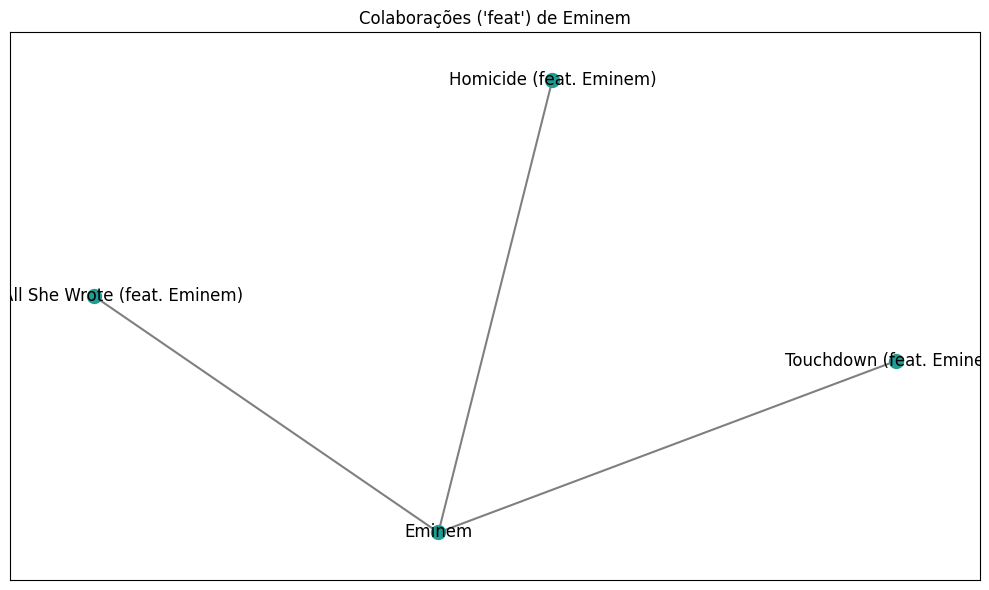

In [ ]:
import pandas as pd
import random
import networkx as nx
import matplotlib.pyplot as plt



artistas_selecionados = df['track_artist'].unique()
artistas_aleatorios = random.sample(list(artistas_selecionados), 15)
artista_exemplo = input("\nEscreva o nome do artista: ")
df_feat = df[df['track_name'].str.contains(f"feat. {artista_exemplo}", case=False, na=False)]

while df_feat.empty:
    print(f"Artista '{artista_exemplo}' não encontrado em colaborações ('feat') na base de dados. Tente novamente.")
    artista_exemplo = input("\nEscreva o nome do artista: ")
    df_feat = df[df['track_name'].str.contains(f"feat. {artista_exemplo}", case=False, na=False)]


G = nx.Graph()

for index, row in df_feat.iterrows():
    artistas_colaboradores = row['track_name'].split(' feat. ')[0].split(', ')
    for artista in artistas_colaboradores:
        if artista != artista_exemplo:
            G.add_edge(artista_exemplo, artista)


plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, k=3)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='#219C90', label={artista_exemplo})
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.5, edge_color='k')
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

plt.title(f"Colaborações ('feat') de {artista_exemplo}")
plt.tight_layout()
plt.show()


Escreva o nome do artista: Justin Bieber


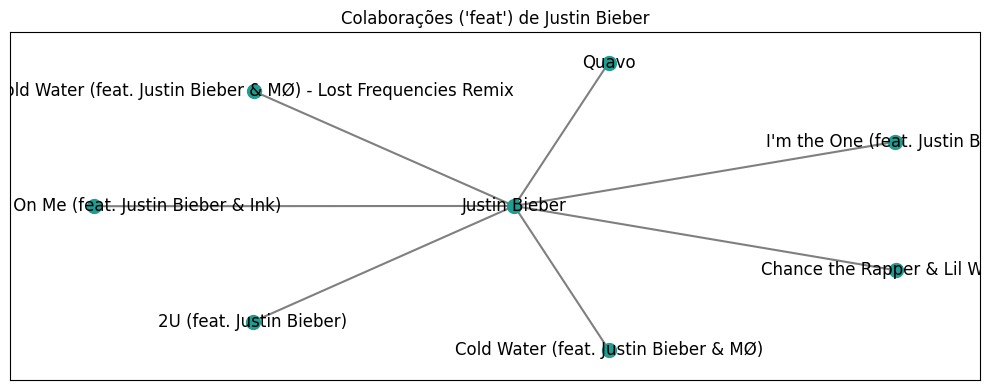

In [ ]:
import random

df = pd.read_csv('spotify_songs.csv')

artistas_selecionados = df['track_artist'].unique()
artistas_aleatorios = random.sample(list(artistas_selecionados), 15)

#print("\nArtistas selecionados aleatoriamente para análise:")
#for artista in artistas_aleatorios:
 #   print(artista)

artista_exemplo = input("\nEscreva o nome do artista: ")

df_feat = df[df['track_name'].str.contains(f"feat. {artista_exemplo}", case=False, na=False)]

while df_feat.empty:
    print(f"Artista '{artista_exemplo}' não encontrado em colaborações ('feat') na base de dados. Tente novamente.")
    artista_exemplo = input("\nEscreva o nome do artista: ")
    df_feat = df[df['track_name'].str.contains(f"feat. {artista_exemplo}", case=False, na=False)]


G = nx.Graph()

for index, row in df_feat.iterrows():
    artistas_colaboradores = row['track_name'].split(' feat. ')[0].split(', ')
    for artista in artistas_colaboradores:
        if artista != artista_exemplo:
            G.add_edge(artista_exemplo, artista)


plt.figure(figsize=(10, 4))
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=100, node_color='#219C90', label={artista_exemplo})
nx.draw_networkx_edges(G, pos, width=1.5, alpha=0.5, edge_color='k')
nx.draw_networkx_labels(G, pos, font_size=12, font_color='black')

plt.title(f"Colaborações ('feat') de {artista_exemplo}")
plt.tight_layout()
plt.show()

### Musicas do artista X


Escreva o nome do artista: Madonna


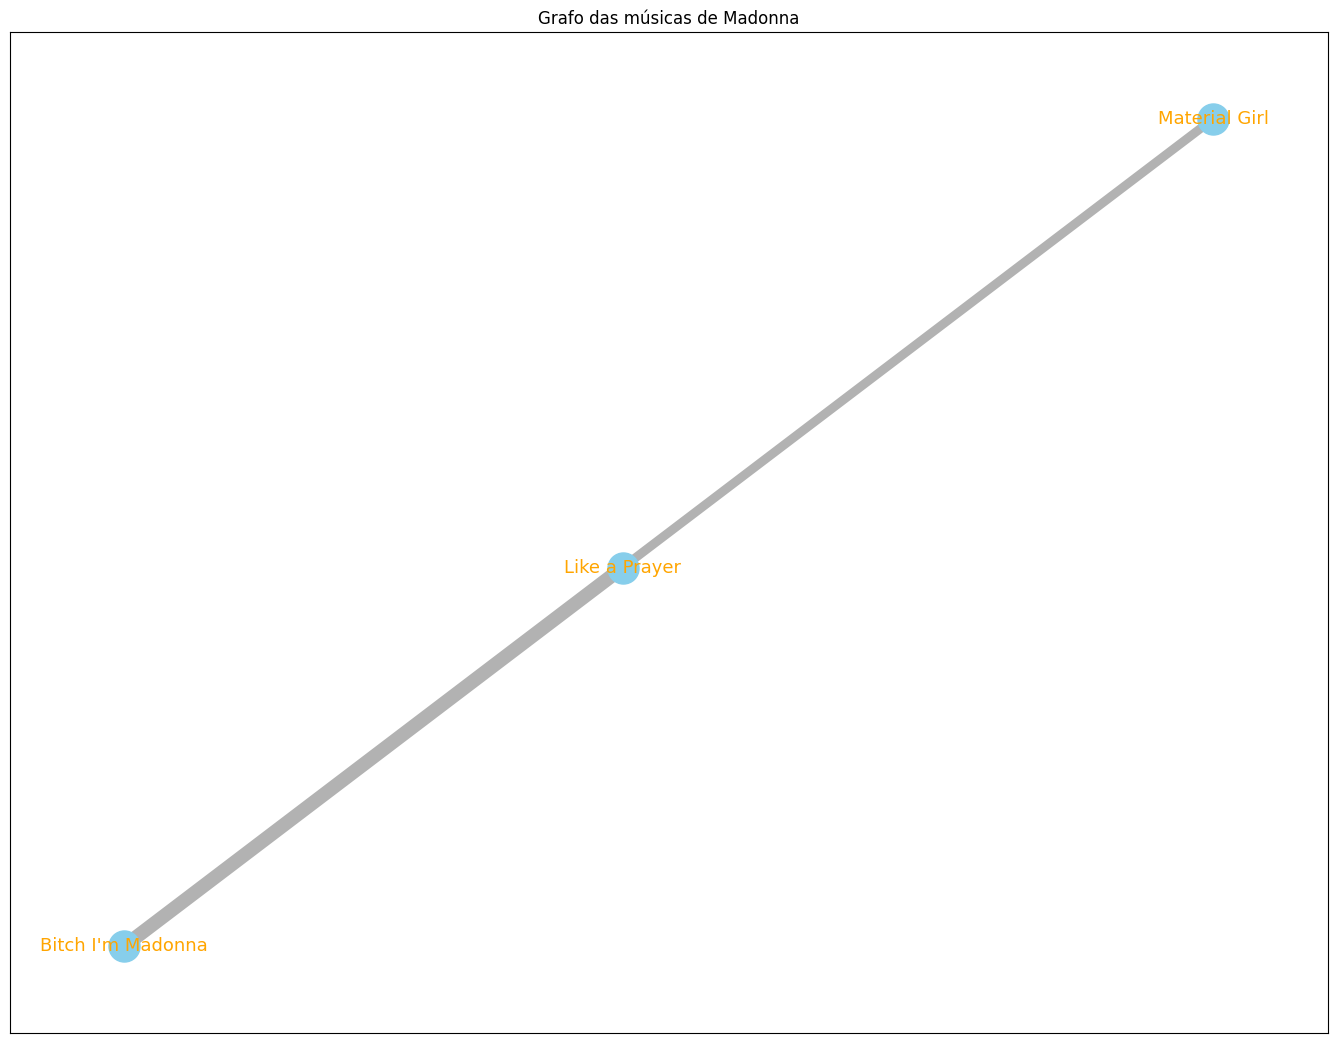

In [ ]:
df = pd.read_csv('spotify_songs.csv')

fracao_amostra = 0.70  # Ajustar conforme necessário
indices_amostra = np.random.choice(df.index, size=int(len(df) * fracao_amostra), replace=False)
df = df.loc[indices_amostra]


colunas_interesse = ['track_artist', 'track_name', 'track_popularity']
df = df[colunas_interesse].dropna()

artistas_selecionados = df['track_artist'].unique()
#print("\nArtistas selecionados para análise:")
#for artista in artistas_selecionados:
 #   print(artista)

artista_exemplo = input("\nEscreva o nome do artista: ")

df_artista = df[df['track_artist'] == artista_exemplo]

if df_artista.empty:
    print(f"Artista '{artista_exemplo}' não encontrado na base de dados.")
else:
    G = nx.Graph()

    for index, row in df_artista.iterrows():
        G.add_node(row['track_name'], popularity=row['track_popularity'])

    for i, track1 in enumerate(df_artista['track_name']):
        for j, track2 in enumerate(df_artista['track_name']):
            if i < j:
                pop1 = df_artista[df_artista['track_name'] == track1]['track_popularity'].values[0]
                pop2 = df_artista[df_artista['track_name'] == track2]['track_popularity'].values[0]
                weight = (pop1 + pop2) / 2
                G.add_edge(track1, track2, weight=weight)

    def normalizar_pesos_arestas(G):
        pesos = [G[u][v]['weight'] for u, v in G.edges()]
        if pesos:
            min_peso = min(pesos)
            max_peso = max(pesos)
            for u, v in G.edges():
                peso = G[u][v]['weight']
                if max_peso > min_peso:
                    G[u][v]['weight'] = (peso - min_peso) / (max_peso - min_peso)
                else:
                    G[u][v]['weight'] = 1.0

    normalizar_pesos_arestas(G)

    plt.figure(figsize=(17, 13))

    pos = nx.spring_layout(G, k=0.4)
    edges = G.edges(data=True)

    for u, v, data in edges:
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=10*data['weight'], alpha=0.3, edge_color='k')

    nx.draw_networkx_nodes(G, pos, node_size=500, node_color='skyblue')
    nx.draw_networkx_labels(G, pos, font_size=13, font_color='orange')

    plt.title(f"Grafo das músicas de {artista_exemplo}")
    plt.show()


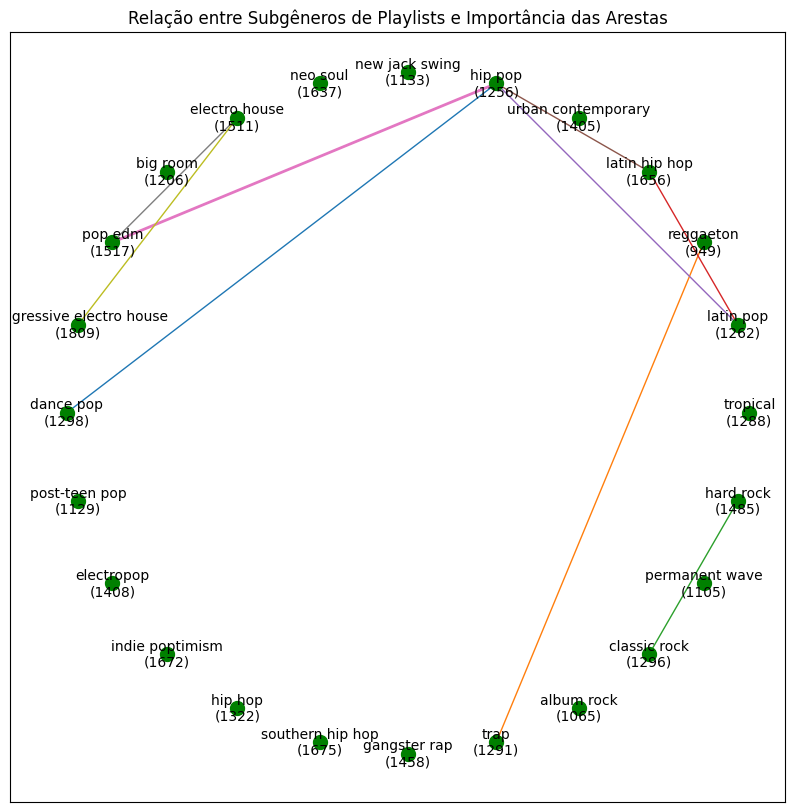

In [ ]:
df_sampled = pd.read_csv('spotify_songs.csv')

subgenre_counts = df_sampled['playlist_subgenre'].value_counts().to_dict()

G = nx.Graph()

subgenres = df_sampled['playlist_subgenre'].unique()
for subgenre in subgenres:
    G.add_node(subgenre, count=subgenre_counts.get(subgenre, 0))

playlists = df_sampled['playlist_id'].unique()
for playlist in playlists:
    playlist_tracks = df_sampled[df_sampled['playlist_id'] == playlist]
    playlist_subgenres = playlist_tracks['playlist_subgenre'].unique()
    for i, subgenre1 in enumerate(playlist_subgenres):
        for subgenre2 in playlist_subgenres[i + 1:]:
            if G.has_edge(subgenre1, subgenre2):
                G[subgenre1][subgenre2]['weight'] += 1
            else:
                G.add_edge(subgenre1, subgenre2, weight=1)

degree_dict = dict(G.degree(weight='weight'))

pos = nx.shell_layout(G)
plt.figure(figsize=(10, 10))

colors = list(mcolors.TABLEAU_COLORS.values())

edges = G.edges(data=True)
for i, (u, v, d) in enumerate(edges):
    nx.draw_networkx_edges(
        G, pos,
        edgelist=[(u, v)],
        width=d['weight'],
        edge_color=colors[i % len(colors)]
    )

nx.draw_networkx_nodes(
    G, pos,
    node_size=100,
    node_color='green'
)

nx.draw_networkx_labels(
    G, pos,
    labels={node: f"{node}\n({subgenre_counts[node]})" for node in G.nodes()},
    font_size=10,
    font_color='black'
)

plt.title('Relação entre Subgéneros de Playlists e Importância das Arestas')
plt.show()


In [ ]:
df = pd.read_csv('spotify_songs.csv')
genre_groups = df.groupby('playlist_genre')
genre = input('Escreva o género musical: ').lower()

genre_df = genre_groups.get_group(genre)

print(f"Número de músicas no género {genre}: {len(genre_df)}")
print(f"Número de artistas únicos no género {genre}: {genre_df['track_artist'].nunique()}")

G = nx.Graph()

artists = genre_df['track_artist'].unique()
for artist in artists:
    G.add_node(artist)

playlists = genre_df['playlist_id'].unique()
for playlist in playlists:
    playlist_tracks = genre_df[genre_df['playlist_id'] == playlist]
    playlist_artists = playlist_tracks['track_artist'].unique()
    for i, artist1 in enumerate(playlist_artists):
        for artist2 in playlist_artists[i + 1:]:
            if G.has_edge(artist1, artist2):
                G[artist1][artist2]['weight'] += 1
            else:
                G.add_edge(artist1, artist2, weight=1)

degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)
closeness_centrality = nx.closeness_centrality(G)

print("\nAlgumas métricas de centralidade para os artistas:")
for artist in artists[:5]:
    print(f"Artista: {artist}")
    print(f"Grau de centralidade: {degree_centrality.get(artist, 0):.4f}")
    print(f"Centralidade de intermediação: {betweenness_centrality.get(artist, 0):.4f}")
    print(f"Centralidade de proximidade: {closeness_centrality.get(artist, 0):.4f}")
    print("")

Escreva o género musical: Rock
Número de músicas no gênero rock: 4951
Número de artistas únicos no gênero rock: 1573

Algumas métricas de centralidade para os artistas:
Artista: Guns N' Roses
Grau de centralidade: 0.1902
Centralidade de intermediação: 0.0043
Centralidade de proximidade: 0.5134

Artista: Hollywood Rose
Grau de centralidade: 0.0006
Centralidade de intermediação: 0.0000
Centralidade de proximidade: 0.3333

Artista: Michael Learns To Rock
Grau de centralidade: 0.0019
Centralidade de intermediação: 0.0000
Centralidade de proximidade: 0.3228

Artista: Air Supply
Grau de centralidade: 0.0961
Centralidade de intermediação: 0.0021
Centralidade de proximidade: 0.4540

Artista: Chicago
Grau de centralidade: 0.1686
Centralidade de intermediação: 0.0045
Centralidade de proximidade: 0.4722



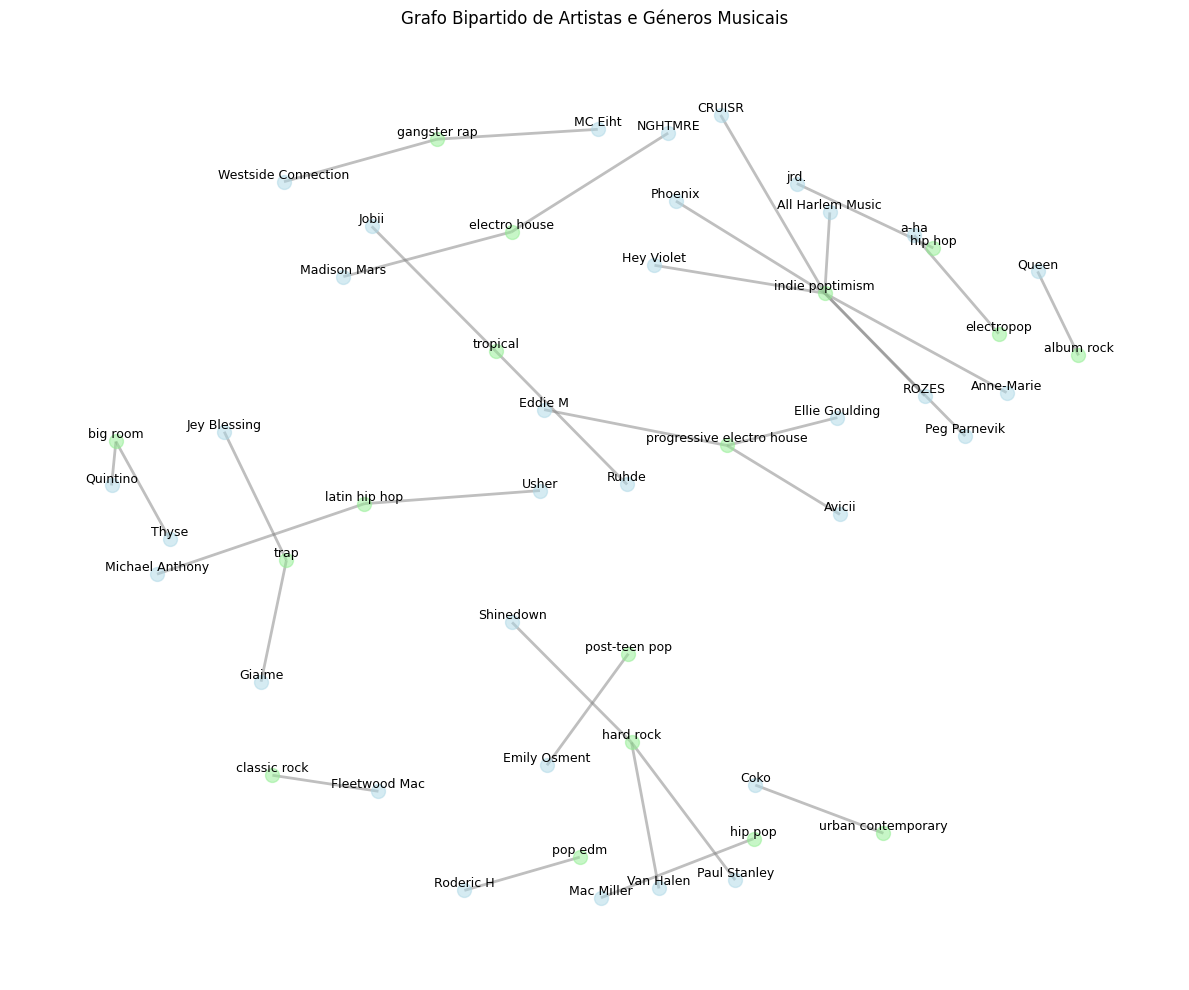

In [ ]:

df = pd.read_csv('spotify_songs.csv')
df = df.sample(frac=0.001)

popularity_by_artist = df.groupby('track_artist')['track_popularity'].mean().sort_values(ascending=False)
G = nx.Graph()

unique_genres = []

for artist, popularity in popularity_by_artist.items():
    artist_genres = df[df['track_artist'] == artist]['playlist_subgenre'].unique()
    G.add_node(artist, type='artist', popularity=popularity)

    for genre in artist_genres:
        if genre not in unique_genres:
            unique_genres.append(genre)
            G.add_node(genre, type='genre')

        G.add_edge(artist, genre)


plt.figure(figsize=(12, 10))
pos = nx.spring_layout(G, k=0.5)
artists = [node for node, data in G.nodes(data=True) if data['type'] == 'artist']
genres = [node for node, data in G.nodes(data=True) if data['type'] == 'genre']


nx.draw_networkx_nodes(G, pos, nodelist=artists, node_size=100, node_color='lightblue', alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=genres, node_size=100, node_color='lightgreen', alpha=0.5)

nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.5, edge_color='grey')
nx.draw_networkx_labels(G, pos, font_size=9, font_color='black', font_family='sans-serif', verticalalignment='bottom')

plt.title('Grafo Bipartido de Artistas e Géneros Musicais')
plt.axis('off')
plt.tight_layout()
plt.show()
